# Лабораторная Работа №1
## Вариант 19

$
Y = \sqrt[3]x;
m_x = 1;
\sigma = \sqrt3;
y_0 = 0
$

## Параметры равномерного распределения
![](./find-a-b.png)

In [7]:
from random import random
import numpy as np
from matplotlib import pyplot as plt
from tabulate import tabulate
from math import floor

max_n = 1000
a = -2
b = 4

## Получение вариационного ряда

In [8]:
def transform_x_to_y_func(value):
    is_negative = value < 0
    result = pow(abs(value), 1 / 3)
    return -result if is_negative else result

def get_eps():
    return random()

def get_x_sample(a, b, n):
    result = []
    for i in range(n):
        x = get_eps() * (b - a) + a
        result.append(x)
    return result

def get_y_sample(x_sample):
    result = []
    for x in x_sample:
        result.append(transform_x_to_y_func(x))
    return sorted(result)

x_sample = get_x_sample(a, b, max_n)

# Вариационный ряд y_sample
y_sample = get_y_sample(x_sample)

## Построение эмпирической функции распределения

     200 | -0.993613  |
|     201 | -0.991765  |
|     202 | -0.990065  |
|     203 | -0.989802  |
|     204 | -0.988315  |
|     205 | -0.987236  |
|     206 | -0.986079  |
|     207 | -0.982676  |
|     208 | -0.980225  |
|     209 | -0.971003  |
|     210 | -0.968275  |
|     211 | -0.961645  |
|     212 | -0.960097  |
|     213 | -0.957854  |
|     214 | -0.955726  |
|     215 | -0.955231  |
|     216 | -0.953036  |
|     217 | -0.952179  |
|     218 | -0.951981  |
|     219 | -0.948632  |
|     220 | -0.947831  |
|     221 | -0.946112  |
|     222 | -0.946109  |
|     223 | -0.943518  |
|     224 | -0.943096  |
|     225 | -0.942013  |
|     226 | -0.92797   |
|     227 | -0.926208  |
|     228 | -0.925892  |
|     229 | -0.925787  |
|     230 | -0.925548  |
|     231 | -0.921254  |
|     232 | -0.918989  |
|     233 | -0.917941  |
|     234 | -0.916959  |
|     235 | -0.913564  |
|     236 | -0.912565  |
|     237 | -0.911207  |
|     238 | -0.908974  |
|     239 | -0.908844  |
|

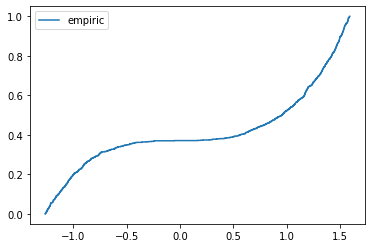

In [9]:
def render_table_view_y_sample(y_sample):
    print("\n" + tabulate([[index, y_sample[index]] for index in range(len(y_sample))], 
                    headers=['Index', 'Value'], 
                    tablefmt='orgtbl') + "\n")

def add_empiric_function_to_plot(y_sample):
    all = len(y_sample)
    y_axis = [0] + [cur / all for cur in range(all)] + [1]
    x_axis = [transform_x_to_y_func(a)] + [y for y in y_sample] + [transform_x_to_y_func(b)]
    plt.step(x_axis, y_axis, label="empiric")
    plt.legend()

render_table_view_y_sample(y_sample)

add_empiric_function_to_plot(y_sample) 
plt.show()

## Построение аналитической функции распределения

![](./analytical.jpg)
*опечатка, F(y)*

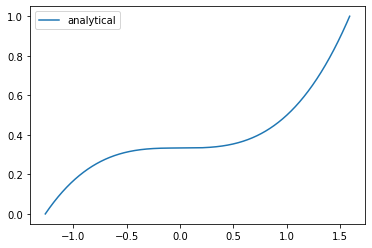

In [16]:
borderA = transform_x_to_y_func(a)
borderB = transform_x_to_y_func(b)

def analytical_func(y):    
    if y >= borderA and y <= borderB:
        return (1 / 6) * (y ** 3 - a)

    return 0 if y < borderA else 1

def add_analytical_function_to_plot(count):
    x_axis = np.linspace(borderA, borderB , count)
    y_axis = [analytical_func(x) for x in x_axis]
    plt.plot(x_axis, y_axis, label="analytical")
    plt.legend()

add_analytical_function_to_plot(1000)
plt.show()

## Сравнение эмпирической и аналитической функции распределения 

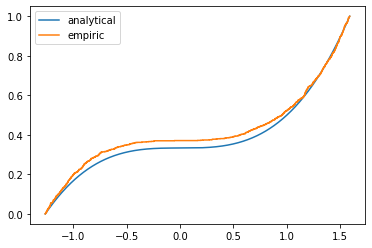

In [17]:
add_analytical_function_to_plot(1000)
add_empiric_function_to_plot(y_sample)
plt.show()